In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N=20
lat=np.ones((N,N,N))
T=10.
beta=1./T
def magnetizacion():
    global lat
    global N
    return sum(sum(sum(lat)))/N**3
def energiaB(i,j,k):
    global lat
    global N
    return -(lat[i,j,k]*(lat[(i-1)%N,j,k]+lat[(i+1)%N,j,k]+lat[i,(j+1)%N,k]+lat[i,(j-1)%N,k]+lat[i,j,(k+1)%N]+lat[i,j,(k-1)%N]))
def flip1():
    global lat
    global beta
    global N
    # Pick a random site
    nx, ny, nz= np.random.randint(0,N),np.random.randint(0,N),np.random.randint(0,N)
    # Calculate current energy of site and neighbors
    en_i=energiaB(nx,ny,nz)
    # If it were flipped
    en_f=-en_i
    if en_f<en_i: # This could be simplified
        lat[nx,ny,nz]*=-1
    elif np.random.random()<min(1,np.exp(-beta*(en_f-en_i))):
        lat[nx,ny,nz]*=-1
def energiaTotal():
    global lat
    return -sum(sum(sum(lat*(np.roll(lat,1,axis=1)+np.roll(lat,-1,axis=1)+np.roll(lat,1,axis=0)+np.roll(lat,-1,axis=0)+np.roll(lat,1,axis=2)+np.roll(lat,-1,axis=2)))))

In [3]:
%timeit flip1()

The slowest run took 12.70 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 6.54 µs per loop


In [4]:
magnetizacion()

0.024250000000000001

In [5]:
lat=np.ones((N,N,N))
itera=10**6
magn=[]
for temp in np.linspace(0.1,8,80):
    T=temp
    beta=1./T
    mag=[]
    for i in range(itera):
        flip1()
        if i>itera-10:
            mag.append(magnetizacion())
    magn.append([T,np.mean(mag)])
magn=np.array(magn)

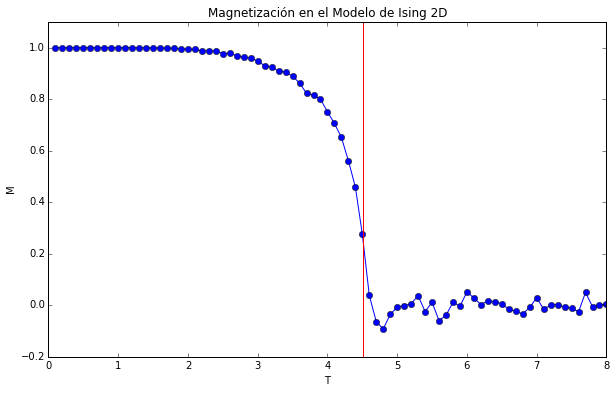

In [6]:
plt.figure(figsize=(10,6))
plt.plot(magn[:,0],magn[:,1],"o-")
plt.xlabel("T")
plt.ylabel("M")
plt.title(u"Magnetización en el Modelo de Ising 2D") 
plt.ylim(-0.2,1.1)
plt.axvline(4.51, color='red')
plt.show()